# <u><span style="font-size:LARGER;"> Social Network of non personal repositories in GitHub </span></u>
====================================================

<b>EL MAJJODI Ayoub </b>
<br><b>Mercha Mehdi</b>
<br><b>M2 SDBD</b>


====================================================

In [2]:
# import Libraries
from github import Github  # Pygithub
import pandas as pd

In [105]:
# using an access token
g = Github('1840d84ac7b94dc5729594b687591fc146c978d8')

In [3]:
# Test token on my repositories
for repo in g.get_user().get_repos():
    print(repo.name)

EronMail-Network-Analysis
library-Managment-Application
Shiny-Web-application-
simple-application-with-Opencv-and-qt


# Data Collection & Data Preprocessing

## Get JS Repositories 

In [5]:
Language = "language:javascript"
# JS repositories
js_repositories = g.search_repositories(query = Language)

list of js repositories created in 2018 and have more than 2 commits

In [29]:
js_18_nP = [] # list of js repositories created in 2018
js_18_nP_Ncom = [] # list of # of commit per repositores
for js_repo in js_repositories: 
    if (js_repo.created_at.year == 2018):
        if len(list(js_repo.get_commits())) >= 2:
            js_18_nP.append(js_repo.full_name)

In [190]:
print("Number of non personal JS repositories: ",
      len(js_18_nP))

Number of non personal JS repositories:  44


Get committers for each repositores

In [387]:
js_d_repo_committers = dict()
for js_np in js_18_nP:
    committers = g.get_repo(js_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    js_d_repo_committers[js_np] = set(committers_lst)

In [390]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
js_repositories_committers = pd.DataFrame.from_dict(js_d_repo_committers, orient='index') 
js_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
trekhleb/javascript-algorithms,HatimLokhandwala,Sylvester-ABC,Diego Paiva,Ocn,Kevin Brewer,Matej Jellus,mcdong,Prateek Karnal,Peter Shershov,Bruce-Feldman,...,None,None,None,None,None,None,None,None,None,None
leonardomso/33-js-concepts,ashwin7mak,Robin Métral,Sylvester-ABC,Vitor Dino,Lokesh,Eliel das Virgens Santos,"Mott, Jeffrey T",Muthu Kumar,Mihail Gumennii,İlker Demir,...,None,None,None,None,None,None,None,None,None,None
iamkun/dayjs,béla,Vlad Gincher,Frank,Mahammed Zishan Khan,Vaidas Bagdonas,semantic-release-bot,ldrovira,Kingsten Banh,Jess,Donato Wolfisberg,...,None,None,None,None,None,None,None,None,None,None
yangshun/front-end-interview-handbook,Harry Mumford-Turner,discodane,Jorge Gonzalez,TaekyunKim,Bingxu Ren,Alex Prut,devJang,Alex Palma,Benjamin L. Moore,Mathias Bynens,...,None,None,None,None,None,None,None,None,None,None
tabler/tabler,Andreas Elia,jwc1,AaronCoplan,Andrew Hainer,entoil,Jamie Kyle,Szabó Gergő,Dhaya Benmessaoud,jose nazario,Jess,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo


In [392]:
js_comm_with_dic = dict()
for i in range(len(js_repositories_committers)):
    A = []
    for v in js_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            js_comm_with_dic[B[0]] = [v for v in B]

In [393]:
js_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in js_comm_with_dic.keys()],
    "committers":[js_comm_with_dic[val] for val in js_comm_with_dic.keys()]
})

In [394]:
js_commi_commis_DF.to_csv("./data/js_commit_list.csv")
js_commi_commis_DF.head()

,1st_committer,committers
0,HatimLokhandwala,"[HatimLokhandwala, Sylvester-ABC, Diego Paiva,..."
1,Sylvester-ABC,"[Sylvester-ABC, Vitor Dino, Lokesh, Eliel das ..."
2,Diego Paiva,"[Diego Paiva, Ocn, Kevin Brewer, Matej Jellus,..."
3,Ocn,"[Ocn, Kevin Brewer, Matej Jellus, mcdong, Prat..."
4,Kevin Brewer,"[Kevin Brewer, Matej Jellus, mcdong, Prateek K..."


#### Create JS final DataFrame


In [395]:
js_committer_A = js_commi_commis_DF['1st_committer']
js_committer_B = js_commi_commis_DF['committers']

# create relation betwwen committers:
js_all_A_committers = []
js_to_other_committes = []

for i in range(len(committer_A)):
    for j in range(1,len(committer_B[i])):
        if(committer_B[i][j] != None):
            js_all_A_committers.append(committer_A[i])
            js_to_other_committes.append(committer_B[i][j])

In [396]:
js_final_Data = pd.DataFrame({
    "committer":all_A_committers,
    "with":to_other_committes
})

In [398]:
js_final_Data.to_csv("./data/js_data.csv")
js_final_Data.head()

,committer,with
0,HatimLokhandwala,Sylvester-ABC
1,HatimLokhandwala,Diego Paiva
2,HatimLokhandwala,Ocn
3,HatimLokhandwala,Kevin Brewer
4,HatimLokhandwala,Matej Jellus


--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------


## Get Java Repositories 

In [380]:
# using an access token
g = Github('febc591d9aa79ba9fdbf54391cd1062eb02b9982')

In [41]:
Language = "language:java"
# Java repositories
java_repositories = g.search_repositories(query = Language)

 list of java repositories created in 2018 and have more than 2 commits

In [42]:
java_18_nP = [] # list of java repositories created in 2018
java_18_nP_Ncom = []
for java_repo in java_repositories: 
    if (java_repo.created_at.year == 2018):
        if len(list(java_repo.get_commits())) >= 2:
            java_18_nP.append(java_repo.full_name)

In [377]:
print("Number of non personal JS repositories: ", len(java_18_nP))

Number of non personal JS repositories:  26


Get committers for each Java repositores

In [399]:
java_d_repo_committers = dict()
for js_np in java_18_nP:
    committers = g.get_repo(js_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    java_d_repo_committers[js_np] = set(committers_lst)

In [400]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
java_repositories_committers = pd.DataFrame.from_dict(java_d_repo_committers, orient='index') 
java_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
Snailclimb/JavaGuide,LiWenGuang,xianlaioy,Snailclimb,lillusory,Young Chen,wangchao96,Gene1994,jiayangchen,Blank,phasd,...,None,None,None,None,None,None,None,None,None,None
alibaba/arthas,vic,0xflotus,BlueT,bohr.qiu,garenchan,Liwei,15101596893,bohr,Hearen,xujiang,...,None,None,None,None,None,None,None,None,None,None
doocs/advanced-java,Naah,陈睿,igayhub,yanglbme,ImgBotApp,Libin Yang,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
JessYanCoding/AndroidAutoSize,JessYan,shiwang,kalasoo,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
GoogleContainerTools/jib,bootstraponline,Gustavo Silva Paiva,Julien Ponge,Chanseok Oh,David Gageot,Wehrli,Appu Goundan,Josh Cummings,Appu,Tad Cordle,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo


In [402]:
java_comm_with_dic = dict()
for i in range(len(java_repositories_committers)):
    A = []
    for v in java_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            java_comm_with_dic[B[0]] = [v for v in B]

In [403]:
java_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in java_comm_with_dic.keys()],
    "committers":[java_comm_with_dic[val] for val
                  in java_comm_with_dic.keys()]
})

In [404]:
java_commi_commis_DF.to_csv("./data/java_commit_list.csv")
java_commi_commis_DF.head()

,1st_committer,committers
0,LiWenGuang,"[LiWenGuang, xianlaioy, Snailclimb, lillusory,..."
1,xianlaioy,"[xianlaioy, boxing.yi, hjzhangxiaoling, qishen..."
2,Snailclimb,"[Snailclimb, lillusory, Young Chen, wangchao96..."
3,lillusory,"[lillusory, Young Chen, wangchao96, Gene1994, ..."
4,Young Chen,"[Young Chen, wangchao96, Gene1994, jiayangchen..."


#### Create Java final DataFrame

In [415]:
java_committer_A = java_commi_commis_DF['1st_committer']
java_committer_B = java_commi_commis_DF['committers']

# create relation betwwen committers:
java_all_A_committers = []
java_to_other_committes = []

for i in range(len(java_committer_A)):
    for j in range(1,len(java_committer_B[i])):
        if(java_committer_B[i][j] != None):
            java_all_A_committers.append(java_committer_A[i])
            java_to_other_committes.append(java_committer_B[i][j])

In [416]:
java_final_Data = pd.DataFrame({
    "committer":java_all_A_committers,
    "with":java_to_other_committes
})

In [ ]:
java_final_Data.to_csv("./data/java_data.csv")
java_final_Data.head()

In [9]:
pd.read_csv("./data/java_data.csv").head()

,Unnamed: 0,committer,with
0,0,LiWenGuang,xianlaioy
1,1,LiWenGuang,Snailclimb
2,2,LiWenGuang,lillusory
3,3,LiWenGuang,Young Chen
4,4,LiWenGuang,wangchao96


--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------


## Get Python Repositories 

In [420]:
# using an access token
g = Github('0f6018dca6a841a58fa6a6ae090850af7dbfa7a0')


In [44]:
Language = "language:python"
# python repositories
python_repositories = g.search_repositories(query = Language)

In [45]:
# list of python repositories created in 2018 and have more than 6 
python_18_nP = [] # list of python repositories created in 2018
python_18_nP_Ncom = []
for python_repo in python_repositories: 
    if (python_repo.created_at.year == 2018):
        if len(list(python_repo.get_commits())) >= 2:
            python_18_nP.append(python_repo.full_name)

In [382]:
print("Number of non personal Python repositories: ", len(python_18_nP))

Number of non personal Python repositories:  64


Get committers for each Python repositores

In [421]:
python_d_repo_committers = dict()
for python_np in python_18_nP:
    committers = g.get_repo(python_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    python_d_repo_committers[python_np] = set(committers_lst)

In [422]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
python_repositories_committers = pd.DataFrame.from_dict(python_d_repo_committers, orient='index') 
python_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
google-research/bert,Peng Li,0xflotus,Abhishek Rao,Bogdan Didenko,JasonJPu,Jacob Devlin,Stefan Schweter,cbockman,Leo Zhao,Ruchen Zhang,...,None,None,None,None,None,None,None,None,None,None
imhuay/Algorithm_Interview_Notes-Chinese,FIREKUN,zhendonghu,HUA Yang,lijunjie127,Wending Peng,XellossRyan,Ir1dXD,None,None,None,...,None,None,None,None,None,None,None,None,None,None
osforscience/TensorFlow-Course,Quinn H Koike,imgg,Amirsina Torfi,brian,avinassh,Brandon Banks,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
NVIDIA/FastPhotoStyle,Yijun Li,Ming-Yu Liu,Ming-Yu Liu 劉洺堉,Si-Yuan,Arul Selvam,suquark,Wesley Williams,None,None,None,...,None,None,None,None,None,None,None,None,None,None
sebastianruder/NLP-progress,Patrick Lewis,hoffart,Anuj More,FredRodrigues,cbeutenmueller,Jie Yang,gangeshwark,Roshan Sridhar,Shikhar Vashishth,cbockman,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo

In [423]:
python_comm_with_dic = dict()
for i in range(len(python_repositories_committers)):
    A = []
    for v in python_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            python_comm_with_dic[B[0]] = [v for v in B]

In [424]:
python_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in python_comm_with_dic.keys()],
    "committers":[python_comm_with_dic[val] for val in python_comm_with_dic.keys()]
})

In [425]:
python_commi_commis_DF.to_csv("./data/python_commit_list.csv")
python_commi_commis_DF.head()

,1st_committer,committers
0,Peng Li,"[Peng Li, 0xflotus, Abhishek Rao, Bogdan Diden..."
1,0xflotus,"[0xflotus, cclauss, Baoyuan Wu, root, Yanbo Fa..."
2,Abhishek Rao,"[Abhishek Rao, Bogdan Didenko, JasonJPu, Jacob..."
3,Bogdan Didenko,"[Bogdan Didenko, JasonJPu, Jacob Devlin, Stefa..."
4,JasonJPu,"[JasonJPu, Jacob Devlin, Stefan Schweter, cboc..."


##### Create Python  DataFrame

In [428]:
python_committer_A = python_commi_commis_DF['1st_committer']
python_committer_B = python_commi_commis_DF['committers']

# create relation betwwen committers:
python_all_A_committers = []
python_to_other_committes = []

for i in range(len(python_committer_A)):
    for j in range(1,len(python_committer_B[i])):
        if(python_committer_B[i][j] != None):
            python_all_A_committers.append(python_committer_A[i])
            python_to_other_committes.append(python_committer_B[i][j])

In [429]:
python_final_Data = pd.DataFrame({
    "committer":python_all_A_committers,
    "with":python_to_other_committes
})

In [430]:
python_final_Data.to_csv("./data/python_data.csv")
python_final_Data.head()

,committer,with
0,Peng Li,0xflotus
1,Peng Li,Abhishek Rao
2,Peng Li,Bogdan Didenko
3,Peng Li,JasonJPu
4,Peng Li,Jacob Devlin


--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------


## Get PHP Repositories 

In [435]:
 # using an access token
g = Github('0f6018dca6a841a58fa6a6ae090850af7dbfa7a0')

In [52]:
Language = "language:php"
# php repositories
php_repositories = g.search_repositories(query = Language)

In [53]:
# list of php repositories created in 2018 and have more than 6 
php_18_nP = [] # list of php repositories created in 2018
php_18_nP_Ncom = []
for php_repo in php_repositories: 
    if (php_repo.created_at.year == 2018):
        if len(list(php_repo.get_commits())) >= 2:
            php_18_nP.append(php_repo.full_name)

In [419]:
print("Number of non personal php repositories: ", len(php_18_nP))

Number of non personal php repositories:  26


Get committers for each php repositores

In [436]:
php_d_repo_committers = dict()
for php_np in php_18_nP:
    committers = g.get_repo(php_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    php_d_repo_committers[php_np] = set(committers_lst)

In [437]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
php_repositories_committers = pd.DataFrame.from_dict(php_d_repo_committers, orient='index') 
php_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
symfony/polyfill-ctype,Fabien Potencier,SAMUEL NELA,Gert de Pagter,BackEndTea,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
donwa/oneindex,OctLan,妖怪不会飞,YinAoXiong,donwa85,Secret,Max Sum,蝦米,naicfeng,donwa,siyaoliu,...,None,None,None,None,None,None,None,None,None,None
paragonie/paseto,François Kooman,Steven Haussmann,Martijn Pieters,Scott,Peter Evans,The Fox in the Shell,Max,Paragon Initiative Enterprises,Gabriel Caruso,Nanne Baars,...,None,None,None,None,None,None,None,None,None,None
HFO4/Cloudreve,Instrye,rainays,AaronLiu,LinEvil,HFO4,Yuanuo,AxtonYao,Samuel NELA,None,None,...,None,None,None,None,None,None,None,None,None,None
beyondcode/laravel-websockets,Lukas Kämmerling,pascalbaljet,Alex Bouma,Rod Elias,Marcel Pociot,Syed I.R,Ahmad Fikrizaman Bin Abd Rahim,Nuno Maduro,Pascal Baljet,Freek Van der Herten,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo

In [438]:
php_comm_with_dic = dict()
for i in range(len(php_repositories_committers)):
    A = []
    for v in php_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            php_comm_with_dic[B[0]] = [v for v in B]

In [439]:
php_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in php_comm_with_dic.keys()],
    "committers":[php_comm_with_dic[val] for val in php_comm_with_dic.keys()]
})

In [440]:
php_commi_commis_DF.to_csv("./data/php_commit_list.csv")
php_commi_commis_DF.head()

,1st_committer,committers
0,Fabien Potencier,"[Fabien Potencier, Christian Flothmann, Nicola..."
1,SAMUEL NELA,"[SAMUEL NELA, Gert de Pagter, BackEndTea, None..."
2,Gert de Pagter,"[Gert de Pagter, BackEndTea, None, None, None,..."
3,BackEndTea,"[BackEndTea, None, None, None, None, None, Non..."
4,None,[None]


##### Create php  DataFrame

In [441]:
php_committer_A = php_commi_commis_DF['1st_committer']
php_committer_B = php_commi_commis_DF['committers']

# create relation betwwen committers:
php_all_A_committers = []
php_to_other_committes = []

for i in range(len(php_committer_A)):
    for j in range(1,len(php_committer_B[i])):
        if(php_committer_B[i][j] != None):
            php_all_A_committers.append(php_committer_A[i])
            php_to_other_committes.append(php_committer_B[i][j])

In [442]:
php_final_Data = pd.DataFrame({
    "committer":php_all_A_committers,
    "with":php_to_other_committes
})

In [443]:
php_final_Data.to_csv("./data/php_data.csv")
php_final_Data.head()

,committer,with
0,Fabien Potencier,Christian Flothmann
1,Fabien Potencier,Nicolas Grekas
2,Fabien Potencier,Nyholm
3,SAMUEL NELA,Gert de Pagter
4,SAMUEL NELA,BackEndTea


--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------


## Get C++ Repositories 

In [447]:
 # using an access token
g = Github('a49368fb816237c3cc387e08641e3c8eae16e105')

In [75]:
Language = "language:c++"
# c++ repositories
cpp_repositories = g.search_repositories(query = Language)

In [76]:
# list of cpp repositories created in 2018 and have more than 6 
cpp_18_nP = [] # list of cpp repositories created in 2018
cpp_18_nP_Ncom = []
for cpp_repo in cpp_repositories: 
    if (cpp_repo.created_at.year == 2018):
        if len(list(cpp_repo.get_commits())) >= 2:
            cpp_18_nP.append(cpp_repo.full_name)

In [444]:
print("Number of non personal cpp repositories: ", len(cpp_18_nP))

Number of non personal cpp repositories:  55


Get committers for each cpp repositores

In [448]:
cpp_d_repo_committers = dict()
for cpp_np in cpp_18_nP:
    committers = g.get_repo(cpp_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    cpp_d_repo_committers[cpp_np] = set(committers_lst)

In [449]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
cpp_repositories_committers = pd.DataFrame.from_dict(cpp_d_repo_committers, orient='index') 
cpp_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,204,205,206,207,208,209,210,211,212,213
MisterBooo/LeetCodeAnimation,MisterBigbooo,水冻寒星,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
ValveSoftware/Proton,Chris Ballinger,Chris Johnston,Adrian Torres,kisak-valve,AsciiWolf,Nikolay Sivov,NoXPhasma,LArrowHead,Jeremy White,Seppo Yli-Olli,...,None,None,None,None,None,None,None,None,None,None
yuzu-emu/yuzu,Jarek Syrylak,Christopher J. Gilbert,"Derek ""Turtle"" Roe",Dharmin K Shah,Kloen Lansfiel,Robin Lambertz,Matthew Brener,Andrix44,noah the goodra,Sean,...,Gareth Higgins,Phillip Stephens,Tiago Morais Morgado,zawata,Matthias Ernst,pippo2931,Anon,Martin Lindhe,Jules Blok,bsaleil
Tencent/MMKV,100mango,Joe,0xflotus,lingol,Sunnyyoung,ysbing,Guo Ling,Nitish Kumar,JonyFang,guoling,...,None,None,None,None,None,None,None,None,None,None
google/filament,François Guthmann,Philip Rideout,Tact Yoshida,emmcbd,Damianno19,Jesse,shartte,Adrian Perez,Sergey,gstanlo,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo

In [450]:
cpp_comm_with_dic = dict()
for i in range(len(cpp_repositories_committers)):
    A = []
    for v in cpp_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            cpp_comm_with_dic[B[0]] = [v for v in B]

In [451]:
cpp_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in cpp_comm_with_dic.keys()],
    "committers":[cpp_comm_with_dic[val] for val in cpp_comm_with_dic.keys()]
})

In [452]:
cpp_commi_commis_DF.to_csv("./data/cpp_commit_list.csv")
cpp_commi_commis_DF.head()

,1st_committer,committers
0,MisterBigbooo,"[MisterBigbooo, 水冻寒星, None, None, None, None, ..."
1,水冻寒星,"[水冻寒星, None, None, None, None, None, None, Non..."
2,None,[None]
3,Chris Ballinger,"[Chris Ballinger, Chris Johnston, Adrian Torre..."
4,Chris Johnston,"[Chris Johnston, Adrian Torres, kisak-valve, A..."


##### Create cpp  DataFrame

In [453]:
cpp_committer_A = cpp_commi_commis_DF['1st_committer']
cpp_committer_B = cpp_commi_commis_DF['committers']

# create relation betwwen committers:
cpp_all_A_committers = []
cpp_to_other_committes = []

for i in range(len(cpp_committer_A)):
    for j in range(1,len(cpp_committer_B[i])):
        if(cpp_committer_B[i][j] != None):
            cpp_all_A_committers.append(cpp_committer_A[i])

In [454]:
cpp_final_Data = pd.DataFrame({
    "committer":cpp_all_A_committers,
    "with":cpp_to_other_committes
})

In [455]:
cpp_final_Data.to_csv("./data/cpp_data.csv")
cpp_final_Data.head()

,committer,with
0,MisterBigbooo,水冻寒星
1,Chris Ballinger,Chris Johnston
2,Chris Ballinger,Adrian Torres
3,Chris Ballinger,kisak-valve
4,Chris Ballinger,AsciiWolf


--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------

## Get C# Repositories 

In [459]:
 # using an access token
g = Github('25d1ca697bb8c24785909ac3797a91c11416c257')

In [79]:
 
Language = "language:C#"
# C# repositories
Cshrp_repositories = g.search_repositories(query = Language)

In [80]:
# list of Cshrp repositories created in 2018 and have more than 6 
Cshrp_18_nP = [] # list of Cshrp repositories created in 2018
Cshrp_18_nP_Ncom = []
for Cshrp_repo in Cshrp_repositories: 
    if (Cshrp_repo.created_at.year == 2018):
        if len(list(Cshrp_repo.get_commits())) >= 2:
            Cshrp_18_nP.append(Cshrp_repo.full_name)

In [457]:
print("Number of non personal Cshrp repositories: ", len(Cshrp_18_nP))

Number of non personal Cshrp repositories:  44


Get committers for each Cshrp repositores

In [460]:
Cshrp_d_repo_committers = dict()
for Cshrp_np in Cshrp_18_nP:
    committers = g.get_repo(Cshrp_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    Cshrp_d_repo_committers[Cshrp_np] = set(committers_lst)

In [461]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
Cshrp_repositories_committers = pd.DataFrame.from_dict(Cshrp_d_repo_committers, orient='index') 
Cshrp_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
aspnet/Blazor,Nate McMaster,Martyn Jones,Andrii Kurdiumov,Pranav K,Stefan Nikolei,Benjamin,WaiChungK,Ryouko Konpaku,uazo,Attila Hajdrik,...,None,None,None,None,None,None,None,None,None,None
dotnet/machinelearning,Steffen Forkmann,Brian Lui,Najeeb Kazmi,George Montanez,Scott Inglis,Tanner Gooding,mfaticaearnin,dan-drews,Zeeshan Siddiqui,Yael Dekel,...,mandyshieh,Jorge Luiz,Rogan Carr,Veikko Eeva,Sabah Shariq,Matei13,Vadim Eksarevskiy,montebhoover,Dan Moseley,Adam Sitnik
Unity-Technologies/UnityCsReference,Unity Technologies,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Microsoft/ailab,Shoji Moto,José Antonio Chio,Microsoft Open Source,tarasha,Stephen Sladek,Miguel Angel Castejón Domínguez,chiijlaw,dtranmobil,Matt Kohl,Yash Bhutoria,...,None,None,None,None,None,None,None,None,None,None
Microsoft/FASTER,Jorgen Thelin,Devesh Singh,udonudon,Guna Prasaad,Ofer Zelig,amiteshenoy,Peter Freiling,Mark Papadakis,Jeff Wendling,Badrish Chandramouli,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo

In [462]:
Cshrp_comm_with_dic = dict()
for i in range(len(Cshrp_repositories_committers)):
    A = []
    for v in Cshrp_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            Cshrp_comm_with_dic[B[0]] = [v for v in B]

In [463]:
Cshrp_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in Cshrp_comm_with_dic.keys()],
    "committers":[Cshrp_comm_with_dic[val] for val in Cshrp_comm_with_dic.keys()]
})

In [464]:
Cshrp_commi_commis_DF.to_csv("./data/Cshrp_commit_list.csv")
Cshrp_commi_commis_DF.head()

,1st_committer,committers
0,Nate McMaster,"[Nate McMaster, Martyn Jones, Andrii Kurdiumov..."
1,Martyn Jones,"[Martyn Jones, Andrii Kurdiumov, Pranav K, Ste..."
2,Andrii Kurdiumov,"[Andrii Kurdiumov, Pranav K, Stefan Nikolei, B..."
3,Pranav K,"[Pranav K, Stefan Nikolei, Benjamin, WaiChungK..."
4,Stefan Nikolei,"[Stefan Nikolei, dotnet-maestro[bot], Stefan S..."


##### Create C#  DataFrame

In [465]:
Cshrp_committer_A = Cshrp_commi_commis_DF['1st_committer']
Cshrp_committer_B = Cshrp_commi_commis_DF['committers']

# create relation betwwen committers:
Cshrp_all_A_committers = []
Cshrp_to_other_committes = []

for i in range(len(Cshrp_committer_A)):
    for j in range(1,len(Cshrp_committer_B[i])):
        if(Cshrp_committer_B[i][j] != None):
            Cshrp_all_A_committers.append(Cshrp_committer_A[i])
            Cshrp_to_other_committes.append(Cshrp_committer_B[i][j])

In [466]:
Cshrp_final_Data = pd.DataFrame({
    "committer":Cshrp_all_A_committers,
    "with":Cshrp_to_other_committes
})

In [467]:
Cshrp_final_Data.to_csv("./data/Cshrp_data.csv")
Cshrp_final_Data.head()

,committer,with
0,Nate McMaster,Martyn Jones
1,Nate McMaster,Andrii Kurdiumov
2,Nate McMaster,Pranav K
3,Nate McMaster,Stefan Nikolei
4,Nate McMaster,Benjamin


--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------

## Get TypeScript Repositories 

In [471]:
# using an access token count2
g = Github('3269825a40205d29a274bf3333d0527d6aafa2e7')

In [93]:
Language = "language:TypeScript"
# TypeScript repositories
TypeScript_repositories = g.search_repositories(query = Language)

In [94]:
# list of TypeScript repositories created in 2018 and have more than 6 
TypeScript_18_nP = [] # list of TypeScript repositories created in 2018
TypeScript_18_nP_Ncom = []
for TypeScript_repo in TypeScript_repositories: 
    if (TypeScript_repo.created_at.year == 2018):
        if len(list(TypeScript_repo.get_commits())) >= 2:
            TypeScript_18_nP.append(TypeScript_repo.full_name)

In [469]:
print("Number of non personal TypeScript repositories: ", len(TypeScript_18_nP))

Number of non personal TypeScript repositories:  120


Get committers for each TypeScript repositores

In [472]:
TypeScript_d_repo_committers = dict()
for TypeScript_np in TypeScript_18_nP:
    committers = g.get_repo(TypeScript_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    TypeScript_d_repo_committers[TypeScript_np] = set(committers_lst)

In [473]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
TypeScript_repositories_committers = pd.DataFrame.from_dict(TypeScript_d_repo_committers, orient='index') 
TypeScript_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,681,682,683,684,685,686,687,688,689,690
denoland/deno,Parsa Ghadimi,Matias Insaurralde,Yoshiya Hinosawa,Pig Fang,Adam Conrad,kyraNET,Chris Bystrek,Allen Hai,Yorkie Liu,"Kevin (Kun) ""Kassimo"" Qian",...,None,None,None,None,None,None,None,None,None,None
pedronauck/docz,Wei-Wei Wu,Andrea Sonny,ShiCheng,Frederik Creemers,ambar,Richard Tan,joerho,Daniel Ramirez,jaburcodes,Jiri Spac,...,None,None,None,None,None,None,None,None,None,None
tensorflow/tfjs,Daniel Smilkov,Ping Yu,Shuhei Iitsuka,Rodrigo Pimentel,Emily Reif,Shanqing Cai,Yannick Assogba,annxingyuan,syt123450,Ali Torki,...,None,None,None,None,None,None,None,None,None,None
fabiospampinato/notable,Fabio Spampinato,Tyler Diaz,David Singleton,Mikael Mello,Anto Christopher,Sosuke Suzuki,Keith Simon,Hongzhuo Liang,Tito Esteves,John Letey,...,None,None,None,None,None,None,None,None,None,None
GoogleChromeLabs/squoosh,Andrea Somaini,Mariko Kosaka,Paul Kinlan,Tiger Oakes,Maciej Matuszewski,Jason Miller,Jamie Farrelly,Cătălin Mariș,Mathias Bynens,Ewa Gasperowicz,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo

In [474]:
TypeScript_comm_with_dic = dict()
for i in range(len(TypeScript_repositories_committers)):
    A = []
    for v in TypeScript_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            TypeScript_comm_with_dic[B[0]] = [v for v in B]

In [475]:
TypeScript_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in TypeScript_comm_with_dic.keys()],
    "committers":[TypeScript_comm_with_dic[val] for val in TypeScript_comm_with_dic.keys()]
})

In [476]:
TypeScript_commi_commis_DF.to_csv("./data/TypeScript_commit_list.csv")
TypeScript_commi_commis_DF.head()

,1st_committer,committers
0,Parsa Ghadimi,"[Parsa Ghadimi, Matias Insaurralde, Yoshiya Hi..."
1,Matias Insaurralde,"[Matias Insaurralde, Yoshiya Hinosawa, Pig Fan..."
2,Yoshiya Hinosawa,"[Yoshiya Hinosawa, 迷渡, zhmushan, Andy Hayden, ..."
3,Pig Fang,"[Pig Fang, Adam Conrad, kyraNET, Chris Bystrek..."
4,Adam Conrad,"[Adam Conrad, kyraNET, Chris Bystrek, Allen Ha..."


##### Create TypeScripts  DataFrame

In [477]:
TypeScript_committer_A = TypeScript_commi_commis_DF['1st_committer']
TypeScript_committer_B = TypeScript_commi_commis_DF['committers']

# create relation betwwen committers:
TypeScript_all_A_committers = []
TypeScript_to_other_committes = []

for i in range(len(TypeScript_committer_A)):
    for j in range(1,len(TypeScript_committer_B[i])):
        if(TypeScript_committer_B[i][j] != None):
            TypeScript_all_A_committers.append(TypeScript_committer_A[i])
            TypeScript_to_other_committes.append(TypeScript_committer_B[i][j])

In [478]:
TypeScript_final_Data = pd.DataFrame({
    "committer":TypeScript_all_A_committers,
    "with":TypeScript_to_other_committes
})

In [479]:
TypeScript_final_Data.to_csv("./data/TypeScript_data.csv")
TypeScript_final_Data.head()

,committer,with
0,Parsa Ghadimi,Matias Insaurralde
1,Parsa Ghadimi,Yoshiya Hinosawa
2,Parsa Ghadimi,Pig Fang
3,Parsa Ghadimi,Adam Conrad
4,Parsa Ghadimi,kyraNET


--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------


## Get Shell Repositories 

In [21]:
# using an access token count2
g = Github('40de8901ffe35b7bee42d3c6b5468b53b8bade50')

In [11]:
Language = "language:shell"
# shell repositories
shell_repositories = g.search_repositories(query = Language)

In [12]:
# list of shell repositories created in 2018 and have more than 6 
shell_18_nP = [] # list of shell repositories created in 2018
shell_18_nP_Ncom = []
for shell_repo in shell_repositories: 
    if (shell_repo.created_at.year == 2018):
        if len(list(shell_repo.get_commits())) >= 2:
            shell_18_nP.append(shell_repo.full_name)

In [13]:
print("Number of non personal shell repositories: ", len(shell_18_nP))

Number of non personal shell repositories:  45


In [22]:
shell_d_repo_committers = dict()
for shell_np in shell_18_nP:
    committers = g.get_repo(shell_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    shell_d_repo_committers[shell_np] = set(committers_lst)

In [23]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
shell_repositories_committers = pd.DataFrame.from_dict(shell_d_repo_committers, orient='index') 
shell_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
dylanaraps/pure-bash-bible,CoolOppo,marinhoc,Crestwave,Chris,Dylan Araps,Chris M,Ben White,black,Ben Greenman,Yun,...,None,None,None,None,None,None,None,None,None,None
yujiangshui/A-Programmers-Guide-to-English,Frederick,Harry yu,Wi1dcard,harryyu,Harry Yu,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
skywind3000/awesome-cheatsheets,TheMasterOfMagic,skywind3000,Linwei,poker,Piping,xinsheng,Chenyu Zhang,pan.pan,Xue Qianming,comwrg,...,None,None,None,None,None,None,None,None,None,None
speed47/spectre-meltdown-checker,Onno Zweers,Stanislav Kholmanskikh,fccagou,積丹尼 Dan Jacobson,Tobias Rüetschi,Corey Hickey,Thibault Nélis,Alex,Abdoul Bah,M. Willis Monroe,...,None,None,None,None,None,None,None,None,None,None
dylanaraps/fff,black,Dylan Araps,Crestwave,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo

In [24]:
shell_comm_with_dic = dict()
for i in range(len(shell_repositories_committers)):
    A = []
    for v in shell_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            shell_comm_with_dic[B[0]] = [v for v in B]

In [25]:
shell_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in shell_comm_with_dic.keys()],
    "committers":[shell_comm_with_dic[val] for val in shell_comm_with_dic.keys()]
})

In [26]:
shell_commi_commis_DF.to_csv("./data/shell_commit_list.csv")
shell_commi_commis_DF.head()

,1st_committer,committers
0,CoolOppo,"[CoolOppo, marinhoc, Crestwave, Chris, Dylan A..."
1,marinhoc,"[marinhoc, Crestwave, Chris, Dylan Araps, Chri..."
2,Crestwave,"[Crestwave, sb51, Marcio Giaxa, Enno Boland, K..."
3,Chris,"[Chris, Dylan Araps, Chris M, Ben White, black..."
4,Dylan Araps,"[Dylan Araps, Crestwave, None, None, None, Non..."


##### Create shell  DataFrame

In [27]:
shell_committer_A = shell_commi_commis_DF['1st_committer']
shell_committer_B = shell_commi_commis_DF['committers']

# create relation betwwen committers:
shell_all_A_committers = []
shell_to_other_committes = []

for i in range(len(shell_committer_A)):
    for j in range(1,len(shell_committer_B[i])):
        if(shell_committer_B[i][j] != None):
            shell_all_A_committers.append(shell_committer_A[i])
            shell_to_other_committes.append(shell_committer_B[i][j])

In [28]:
shell_final_Data = pd.DataFrame({
    "committer":shell_all_A_committers,
    "with":shell_to_other_committes
})

In [29]:
shell_final_Data.to_csv("./data/shell_data.csv")
shell_final_Data.head()

,committer,with
0,CoolOppo,marinhoc
1,CoolOppo,Crestwave
2,CoolOppo,Chris
3,CoolOppo,Dylan Araps
4,CoolOppo,Chris M


--------------------------------------------------------------
--------------------------------------------------------------

## Get C Repositories 

In [38]:
# using an access token count2
g = Github('55ac11b842943743873e0ebc075ced5dd4d1e418')

In [32]:
Language = "language:c"
# c repositories
c_repositories = g.search_repositories(query = Language)

In [33]:
# list of c repositories created in 2018 and have more than 6 
c_18_nP = [] # list of c repositories created in 2018
c_18_nP_Ncom = []
for c_repo in c_repositories: 
    if (c_repo.created_at.year == 2018):
        if len(list(c_repo.get_commits())) >= 2:
            c_18_nP.append(c_repo.full_name)

In [34]:
print("Number of non personal C repositories: ", len(c_18_nP))

Number of non personal C repositories:  32


In [39]:
c_d_repo_committers = dict()
for c_np in c_18_nP:
    committers = g.get_repo(c_np).get_commits()
    committers_lst = []
    for committer in committers:
        committers_lst.append(committer.commit.author.name)
    c_d_repo_committers[c_np] = set(committers_lst)

In [40]:
# convert Dictionary into dataframe ["repo", "committers"] 
# data frame of each repositories with committeres
c_repositories_committers = pd.DataFrame.from_dict(c_d_repo_committers, orient='index') 
c_repositories_committers.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
Microsoft/winfile,Austin Wise,Craig Wittenberg,misirlou-tg,Xiaoyin Liu,BaldwinTechnology,Azarien,bytes-and-bits,fuzun,Microsoft GitHub User,Thai Nguyen,...,None,None,None,None,None,None,None,None,None,None
pervognsen/bitwise,MAQIL Abdelmouttalib,Theodore Dubois,David Butler,fierydrake,David Grayson,Steve Tranby,Martin Cavanagh,jose nazario,Per Vognsen,Lior David,...,None,None,None,None,None,None,None,None,None,None
rhysd/vim.wasm,Linda_pp,Bram Moolenaar,rhysd,Guillaume Simard,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Atmosphere-NX/Atmosphere,The Dax,Max K,Kate J. Temkin,Luke Street,Benoit7413,MerryMage,Kate Temkin,Hylian,Rajko Stojadinovic,CyberVision,...,None,None,None,None,None,None,None,None,None,None
wangzheng0822/algo,wustzjf,q23wwwwe,robin,Observer,Liam Huang,李超,danielyan86,gz1301,specialyang,ykw,...,None,None,None,None,None,None,None,None,None,None


create dict{'committer_1':"committers"} contain relation between committers of same repo


In [41]:
c_comm_with_dic = dict()
for i in range(len(c_repositories_committers)):
    A = []
    for v in c_repositories_committers.iloc[i]:
        A.append(v)
        for k in range(len(A)):
            B = []
            B.append(A[k])
            for h in range(k+1, len(A)):
                B.append(A[h])
            c_comm_with_dic[B[0]] = [v for v in B]

In [42]:
c_commi_commis_DF = pd.DataFrame({
    "1st_committer" :[v for v in c_comm_with_dic.keys()],
    "committers":[c_comm_with_dic[val] for val in c_comm_with_dic.keys()]
})

In [43]:
c_commi_commis_DF.to_csv("./data/c_commit_list.csv")
c_commi_commis_DF.head()

,1st_committer,committers
0,Austin Wise,"[Austin Wise, Craig Wittenberg, misirlou-tg, X..."
1,Craig Wittenberg,"[Craig Wittenberg, misirlou-tg, Xiaoyin Liu, B..."
2,misirlou-tg,"[misirlou-tg, Xiaoyin Liu, BaldwinTechnology, ..."
3,Xiaoyin Liu,"[Xiaoyin Liu, BaldwinTechnology, Azarien, byte..."
4,BaldwinTechnology,"[BaldwinTechnology, Azarien, bytes-and-bits, f..."


##### Create C  DataFrame

In [44]:
c_committer_A = c_commi_commis_DF['1st_committer']
c_committer_B = c_commi_commis_DF['committers']

# create relation betwwen committers:
c_all_A_committers = []
c_to_other_committes = []

for i in range(len(c_committer_A)):
    for j in range(1,len(c_committer_B[i])):
        if(c_committer_B[i][j] != None):
            c_all_A_committers.append(c_committer_A[i])
            c_to_other_committes.append(c_committer_B[i][j])

In [45]:
c_final_Data = pd.DataFrame({
    "committer":c_all_A_committers,
    "with":c_to_other_committes
})

In [46]:
c_final_Data.to_csv("./data/c_data.csv")
c_final_Data.head()

,committer,with
0,Austin Wise,Craig Wittenberg
1,Austin Wise,misirlou-tg
2,Austin Wise,Xiaoyin Liu
3,Austin Wise,BaldwinTechnology
4,Austin Wise,Azarien


## Create Github Dataset

In [11]:
## Add Programming Language name to each committer
js_data = pd.read_csv("./data/js_data.csv")
js_data["Language"] =  "JavaScript"

java_data = pd.read_csv("./data/java_data.csv")
java_data["Language"] =  "Java"

python_data = pd.read_csv("./data/python_data.csv")
python_data["Language"] ="Python"

php_data = pd.read_csv("./data/php_data.csv")
php_data["Language"] = "Php"

cpp_data = pd.read_csv("./data/cpp_data.csv")
cpp_data["Language"] = "Cpp"

cShrp_data = pd.read_csv("./data/Cshrp_data.csv")
cShrp_data["Language"] = "C#"

TypeScript_data = pd.read_csv("./data/TypeScript_data.csv")
TypeScript_data["Language"] ="TypeScript"

shell_data = pd.read_csv("./data/shell_data.csv")
shell_data["Language"] = "Shell"

c_data = pd.read_csv("./data/c_data.csv")
c_data["Language"] = "C"

In [20]:
# Data Frames Concatination
Frames = [js_data,java_data,python_data,
            php_data,cpp_data,cShrp_data,
            TypeScript_data,shell_data,c_data]

GithubCommitter_Dataset = pd.concat(Frames)

del GithubCommitter_Dataset["Unnamed: 0"] # clean unnamed col

GithubCommitter_Dataset.to_csv("./data/Committers_Github_Dataset.csv")

In [21]:
GithubCommitter_Dataset.head()

,committer,with,Language
0,HatimLokhandwala,Sylvester-ABC,JavaScript
1,HatimLokhandwala,Diego Paiva,JavaScript
2,HatimLokhandwala,Ocn,JavaScript
3,HatimLokhandwala,Kevin Brewer,JavaScript
4,HatimLokhandwala,Matej Jellus,JavaScript


# Github 2018 Statistics

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import *

#### Repositories per Programming Language

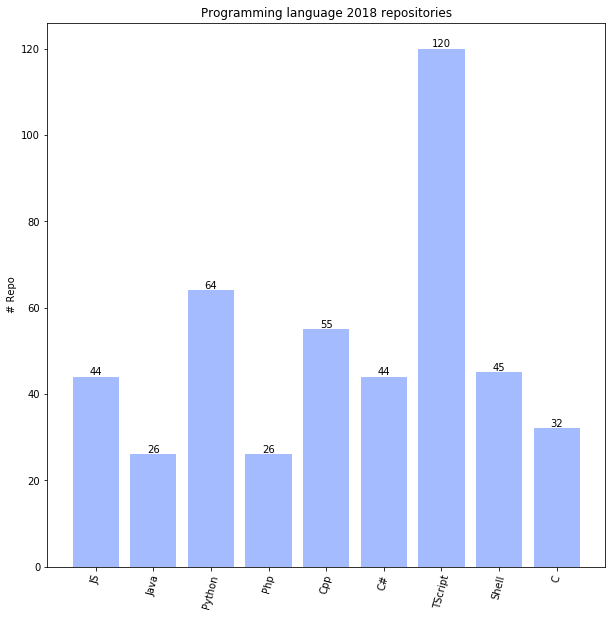

In [4]:
plt.figure(figsize=(10,10))
X =[ "JS", "Java", "Python", "Php", "Cpp", "C#", "TScript", "Shell", "C"]
Y =[44, 26, 64, 26,55,44,120,45,32]
y_pos = np.arange(len(X))
bar1 = plt.bar(y_pos, Y, align='center', alpha=0.5,color = "#4d79ff")
plt.xticks(y_pos, X,rotation=75)
plt.ylabel('# Repo')
plt.title('Programming language 2018 repositories')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

#### Group commiter per programming language

In [5]:
# read data
Committer_github = pd.read_csv("./data/Committers_Github_Dataset.csv")

# group by with dataframe
Comm_groups = Committer_github["committer"].groupby(Committer_github['Language'])

In [6]:
# Statistic about languages and committers
Comm_groups.describe()

,count,unique,top,freq
Language,,,,
C,11256,464,Rene Hexel,105
C#,13868,680,Steffen Forkmann,97
Cpp,57361,1169,Jarek Syrylak,213
Java,11109,477,lind,101
JavaScript,72413,1552,Sum,159
Php,8041,434,Willem Stuursma-Ruwen,80
Python,29928,1023,Josh,152
Shell,218963,1005,Jan S,656
TypeScript,268564,2246,bgc2140,690


#### Programming Language per Committs

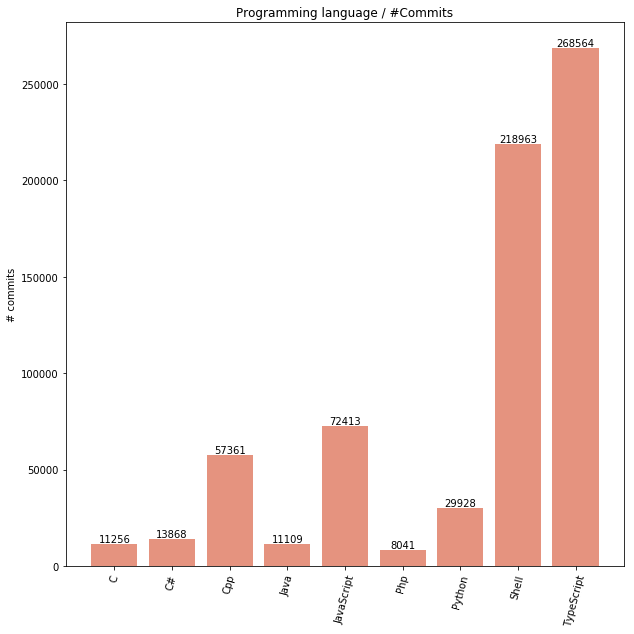

In [7]:
plt.figure(figsize=(10,10))
PLanguage_per_commits = dict(Comm_groups.count())
bar = plt.bar(PLanguage_per_commits.keys(), PLanguage_per_commits.values(), align='center', alpha=0.5,color = "#cc2900")
plt.xticks(y_pos, PLanguage_per_commits.keys(),rotation=75)
plt.ylabel('# commits')
plt.title('Programming language / #Commits')
for nbr in bar:
    height = nbr.get_height()
    plt.text(nbr.get_x() + nbr.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

#### Programming Language per Committs

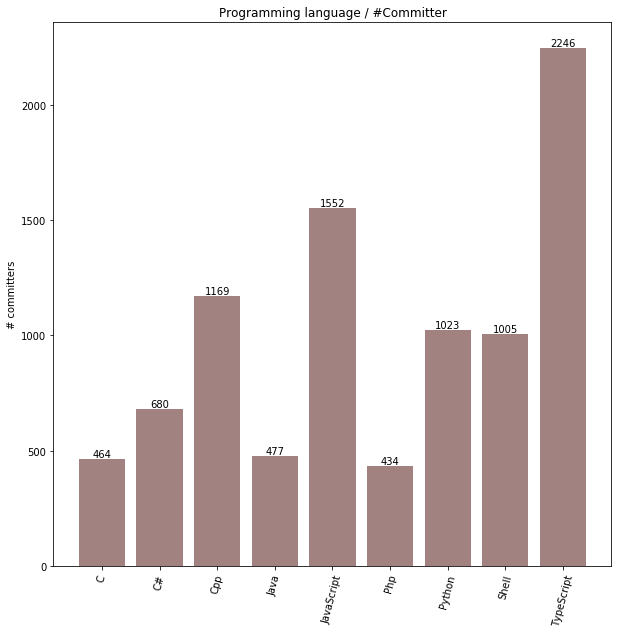

In [8]:
plt.figure(figsize=(10,10))
PLanguage_per_committers = dict(Comm_groups.nunique())
y_pos = np.arange(9)
bar = plt.bar(PLanguage_per_committers.keys(), PLanguage_per_committers.values(), align='center', alpha=0.5,color = "#460505")
plt.xticks(y_pos, PLanguage_per_committers.keys(),rotation=75)
plt.ylabel('# committers')
plt.title('Programming language / #Committer')
for nbr in bar:
    height = nbr.get_height()
    plt.text(nbr.get_x() + nbr.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
plt.show()

#### The committer that commit on different languages

In [9]:
# group by with dataframe
committer_per_language = Committer_github["Language"].groupby(Committer_github['committer'])
committer_per_language = pd.DataFrame(committer_per_language.unique())

In [10]:
# save data frame 
committer_per_language.to_csv("./committer_per_language.csv")
committer_per_language = pd.read_csv("./committer_per_language.csv")

In [11]:
committer_per_lan = pd.DataFrame().reindex_like(committer_per_language)
for l, i in zip(committer_per_language["Language"],range(0,len(committer_per_language))):
    committer_per_lan["committer"] = committer_per_language["committer"]
    committer_per_lan["Language"][i] = l.split()

/home/aelma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/aelma/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
committer_=[]  # comitter on different language
PLanguage = [] # Language
nbr_lan = []
for l,i in zip(committer_per_lan["Language"],range(0,len(committer_per_lan))):
    if len(l) >=2:
        committer_.append(committer_per_lan["committer"][i])
        nbr_lan.append(len(l))
        PLanguage.append(l)    

In [13]:
committer_in_diff = pd.DataFrame({
    "committer" : committer_,
    "#PL"       : nbr_lan,
    "Language"  : PLanguage
})

In [14]:
committer_in_diff.sort_values(by=["#PL"],ascending=False)

,committer,#PL,Language
0,0xflotus,6,"[['JavaScript', 'Java', 'Python', 'Cpp', 'C#',..."
193,root,5,"[['Python', 'Cpp', 'TypeScript', 'Shell', 'C']]"
199,unknown,4,"[['Python', 'Cpp', 'TypeScript', 'C']]"
180,jose nazario,4,"[['JavaScript', 'Python', 'Shell', 'C']]"
41,David,4,"[['Cpp', 'C#', 'TypeScript', 'Shell']]"
130,Sergey,4,"[['JavaScript', 'Cpp', 'TypeScript', 'C']]"
9,Alexander,4,"[['JavaScript', 'Php', 'TypeScript', 'C']]"
39,Daniel Ruf,4,"[['JavaScript', 'Java', 'Php', 'TypeScript']]"
95,Max,4,"[['Java', 'Php', 'Cpp', 'TypeScript']]"
81,Kurt,3,"[['C#', 'TypeScript', 'C']]"


The number of user that commit in different languages : 204

# Network Analysis

In [4]:
# Import Network Anlysis Library 
import networkx as nx
import pandas as pd

### Create Network between committers

In [5]:
GithubCommitter_Dataset = pd.read_csv('./data/Committers_Github_Dataset.csv')
Github_Graph = nx.from_pandas_edgelist(GithubCommitter_Dataset,
                                      "committer","with")

In [ ]:
# Visualize the network
d = nx.degree(Github_Graph)
plt.figure(figsize = (120, 120))
layout = nx.spring_layout(Github_Graph)
nx.draw_networkx(Github_Graph, layout,node_size = 50,with_labels=False,alpha= 0.6)
plt.axis('off')
plt.savefig('./git_graph.pdf')
plt.savefig('./git_graph.jpeg')
plt.show()

<img src="./git_graph.jpeg">

In [4]:
# Network Info
print(nx.info(Github_Graph))
print("Is Connected",nx.is_connected(Github_Graph))

Name: 
Type: Graph
Number of nodes: 9173
Number of edges: 691477
Average degree: 150.7635
Is Connected False


#### Metrics

In [13]:
# Degree of each committer
from operator import itemgetter

degree_dict=dict(nx.degree(Github_Graph))
sorted_degree = sorted(degree_dict.items(), key = itemgetter(1),reverse = True)

In [6]:
degree = pd.DataFrame(sorted_degree)
degree.head()

,0,1
0,David,1813
1,root,1569
2,Your Name,1365
3,Administrator,890
4,David Yip,842


Betweenness Centrality

In [7]:
bt_centrality = nx.betweenness_centrality(Github_Graph)

Clossness Centrality

In [8]:
clos_centrality = nx.closeness_centrality(Github_Graph)

In [46]:
# sort Betweenness Centrality
bet_sorted = sorted(bt_centrality.items(), key = itemgetter(1), reverse = True)
betw_centra = pd.DataFrame(bet_sorted,columns=['Committer','Betweness'])


print("Betweenness Centrality")
betw_centra.to_csv("./Betweenness_Centrality.csv")
betw_centra.head()

Betweenness Centrality


,Committer,Betweness
0,0xflotus,0.127099
1,Daniel Ruf,0.112149
2,root,0.094414
3,David,0.090321
4,Michael,0.043723


In [47]:
# sort Closness Centrality
clos_sorted = sorted(clos_centrality.items(), key=itemgetter(1), reverse = True)
clos_centr = pd.DataFrame(clos_sorted, columns=['Committer','Closness'])

print("Closness Centrality")
clos_centr.to_csv("Clos_centrality.csv")
clos_centr.head()

Closness Centrality


,Committer,Closness
0,root,0.339611
1,0xflotus,0.325897
2,David,0.324193
3,Daniel Ruf,0.314975
4,David Yip,0.313040


Degree Distribution

In [43]:
def plot_degree_distribution() :
    degs = {}
    for n in Github_Graph.nodes() :
        deg = Github_Graph.degree( n )
        if deg not in degs :
            degs [ deg ] = 0
        degs [ deg ] += 1
    items = sorted ( degs . items () )
    items = sorted ( degs . items () )
    fig = plt.figure()
    ax = fig.add_subplot (111)
    ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title(" Github Degree Distribution " )

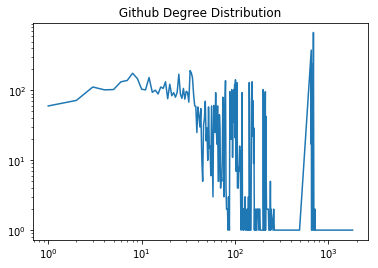

In [44]:
plot_degree_distribution()

Connected Component

In [43]:
components = nx.connected_components(Github_Graph)
largest_component = max(components, key = len)
print("the lenght of the largest component in the graph is :", len(largest_component))

the lenght of the largest component in the graph is : 8090


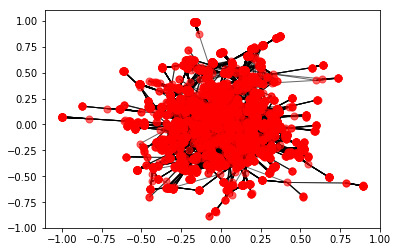

In [14]:
# Create subgraph of the largest component
subgraph = Github_Graph.subgraph(largest_component)
layout = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, layout,node_size = 50,with_labels=False,alpha= 0.6)

### Core-Periphery

In [2]:
import cpalgorithm as cpa

In [6]:
lc = cpa.LapCore() # LapCore Algorithm 
lc.detect(Github_Graph)

In [7]:
c = lc.get_pair_id()   # Dict :node names and the Core-periphery to wich node belongs
x = lc.get_coreness()  # Dict :node names and coreness values between 0 and 1 : 1 core , 0 peripheral node

In [8]:
print("there is one core in Github Network :",set(c.values()))
print("there is committer that belongs to Core and others belongs to periphery :",set(x.values()))

there is one core in Github Network : {0}
there is committer that belongs to Core and others belongs to periphery : {0.0, 1.0}


# Create Network between committers and Programming Languages

In [10]:
Committer_Language = nx.from_pandas_edgelist(GithubCommitter_Dataset,
                                      "committer","Language")

In [44]:
# Network Info
print(nx.info(Committer_Language))
print("Is Connected",nx.is_connected(Committer_Language))

Name: 
Type: Graph
Number of nodes: 8816
Number of edges: 9051
Average degree:   2.0533
Is Connected True


<figure>
  <figcaption><b>'Netwrok between committers and programming languages, using Gephi'</b></figcaption>
  <img  src='com_Lan.png' />
</figure>
<b>The graph is Connected because there is alot of comitters commit in different languages <br>
204 commit in more than one programming language.
</b>

In [20]:
# Degree of each committer
from operator import itemgetter

degree_lan=dict(nx.degree(Committer_Language))
Language_degree = sorted(degree_lan.items(), key = itemgetter(1),reverse = True)
degree = pd.DataFrame(Language_degree,columns=["node","degree"])

The degree of each language proved the statistic that we present above.

In [21]:
degree.head(9)

,node,degree
0,TypeScript,2246
1,JavaScript,1553
2,Cpp,1169
3,Python,1023
4,Shell,1005
5,C#,680
6,Java,477
7,C,464
8,Php,434


### Comminuty Detection 

for community detection, it's evident that we have each language and their committers construct community